# Classification
Please ensure you carefully read all instructions on the assignment page, this section, and the rest of the notebook. If anything is unclear at any time please ask the teaching team well in advance of the assignment deadline.

In addition to all of the instructions in the body of the assignment below, you must also follow the following technical instructions for all assignments in this unit. *Failure to do so may result in a grade of zero.*
* [At the bottom of the page](#Submission-Test) is some code which checks you meet the submission requirements. You **must** ensure that this runs correctly before submission.
* Do not modify or delete any of the cells that are marked as test cells, even if they appear to be empty.
* Do not duplicate any cells in the notebook – this can break the marking script. Instead, insert a new cell (e.g. from the menu) and copy across any contents as necessary.

Remember to save and backup your work regularly, and double-check you are submitting the correct version.

This notebook is the primary reference for your submission. You may write code in separate `.py` files but it must be clearly imported into the notebook so that it runs without needing to reference those files, and you must explain clearly what functionality is contained in those files (through comments, markdown cells, etc).

**You should also submit a readme file (.txt or .md) explaining your implementation, any decisions or extensions you made, and what parameter values you used.** This explanation should demonstrate what you have done and that you have done it on your own, e.g., you understand methods that you have used. Failure to submit a readme file, or if the readme file does not contain enough information to demonstrate what you have done and that you actually understand what you have done may result in getting zero marks for this assignment.

As always, **the work you submit for this assignment must be entirely your own.** Do not copy or work with other students. Do not copy answers that you find online. These assignments are designed to help improve your understanding first and foremost – the process of doing the assignment is part of *learning*. They are also used to assess your ability, and so you must uphold academic integrity. Submitting plagiarised work risks your entire place on your degree.

**This assignment is worth 20% of your total mark for the unit. The deadline for this assignment is 12 May 2023 at 8 pm UK time.** Please ask for help if you are struggling. Your submission should include:

* this notebook filled with your code
* readme file (.txt or .md)
* any additional .py files that you may wish to use (remember to properly import them in this notebook)

## Getting Started
This assignment contains 2 parts. The first one is **compulsory** and it is worth 70% of your mark for this assignment. The second part is **optional** if you would like to get a higher (over 70%) mark for this assignment. 

This assignment is devoted to supervised machine learning. In the first part of the assignment you are asked to write a classifier to detect any spam email messages. In the second part of the assignment you are asked to work on feature design for a classifier to classify hand written digits.

In [1]:
%matplotlib inline

# Part 1 (compulsory, worth 70% of the mark for this assignment) - Spam filtering

Spam refers to unwanted email, often in the form of advertisements. In the literature, an email that is **not** spam is called *ham*. Most email providers offer automatic spam filtering, where spam emails will be moved to a separate inbox based on their contents. Of course this requires being able to scan an email and determine whether it is spam or ham, a classification problem. This is the subject of this part of the assignment.

You will need to write a supervised learning based classifier to determine whether a given email is spam or ham. You must write and submit the code in this notebook. The training data is provided for you. You may use any classification method. Marks will be awarded primarily based on the accuracy of your classifier on unseen test data, but there are also marks for estimating how accurate you think your classifier will be.


## Choice of Algorithm
While the classification method is a completely free choice, the assignment folder includes [a separate notebook file](data/naivebayes.ipynb) which can help you implement a Naïve Bayes solution. If you do use this notebook, you are still responsible for porting your code into *this* notebook for submission. A good implementation should give a high  enough accuracy to get a good grade.

You could also consider a k-nearest neighbour algorithm, but this may be less accurate. Logistic regression is another option that you may wish to consider.

If you are looking to go beyond the scope of the unit, you might be interested in building something more advanced, like an artificial neural network. This is possible just using `numpy`, but will require significant self-directed learning. *Extensions like this are left unguided and are not factored into the unit workload estimates.*

**Note:** you may use helper functions in libraries like `numpy` or `scipy`, but you **must not** import code which builds entire models for you. This includes but is not limited to use of libraries like `scikit-learn`, `tensorflow`, or `pytorch` – there will be plenty of opportunities for these libraries in later units. The point of this assignment is to understand code of the actual algorithm yourself. ***If you are in any doubt about any particular library or function please ask the teaching team.*** Submissions which ignore this will receive penalties or even zero marks.

If you choose to implement more than one algorithm, please feel free to include your code in a separate file and talk about it the readme file, but only the code in this notebook will be used in the automated testing and it will form your mark. You may get extra points for the additional algorithm, but it is not guaranteed. Therefore, if of any doubt, it is better to spend your time focusing on making one algorithm working to its best performance rather than to implement an additional algorithm.

## Training Data - spam filtering
The training data is described below and has 1000 rows. There is also a 500 row set of test data. These are functionally identical to the training data, they are just in a separate csv file to encourage you to split out your training and test data. You will be assessed on the additional hidden test data. You should consider how to best make use of all available data without overfitting, and to help produce an unbiased estimate for your classifier's accuracy.

The cell below loads the training data into a variable called `training_spam`.

In [2]:
import numpy as np

training_spam = np.loadtxt(open("data/training_spam.csv"), delimiter=",").astype(int)
print("Shape of the spam training data set:", training_spam.shape)
print(training_spam)

Shape of the spam training data set: (1000, 55)
[[1 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [1 1 1 ... 1 1 0]
 [1 0 0 ... 1 1 1]]


Your training set consists of 1000 rows and 55 columns. Each row corresponds to one email message. The first column is the _response_ variable and describes whether a message is spam `1` or ham `0`. The remaining 54 columns are _features_ that you will use to build a classifier. These features correspond to 54 different keywords (such as "money", "free", and "receive") and special characters (such as ":", "!", and "$"). A feature has the value `1` if the keyword appears in the message and `0` otherwise.

As mentioned, there is also a 500-row set of *test data*. It contains the same 55 columns.

In [3]:
testing_spam = np.loadtxt(open("data/testing_spam.csv"), delimiter=",").astype(int)
print("Shape of the spam testing data set:", testing_spam.shape)
print(testing_spam)

Shape of the spam testing data set: (500, 55)
[[1 0 0 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


## Spam filtering classification
**Write all of the code for your classifier below this cell.** 

There is some very rough skeleton code in the cell directly below. You may insert more cells below this if you wish, but you **must not** duplicate any cells as this can break the grading script.

### Submission Requirements
Your code must provide a variable with the name `spam_classifier`. This object must have a method called `predict` which takes input data and returns class predictions. The input will be a single $n \times 54$ numpy array, your classifier should return a numpy array of length $n$ with classifications. There is a demo in the cell below, and a test you can run before submitting to check your code is working correctly.

Your code must run on our test machine in under 30 seconds. If you wish to train a more complicated model (e.g. neural network) which will take longer, you are welcome to save the model's weights as a file and then load these in the cell below so we can test it. You must include the code which computes the original weights, but this must not run when we run the notebook – comment out the code which actually executes the routine and make sure it is clear what we need to change to get it to run. 

Remember that we will be testing your final classifier on additional hidden data.

In [4]:
# This skeleton code simply classifies every input as ham
#
# Here you can see there is a parameter k that is unused, the
# point is to show you how you could set up your own. You can
# also see a train method that does nothing here
# but your classifier would probably do the main work here. 
# Modify this code as much as you like so long as the 
# accuracy test in the cell below runs

class MyClassifier:
    def __init__(self):
        pass
        
    
    def estimate_log_class_priors(self, data):
        """
        Given a data set with binary response variable (0s and 1s), 
        calculate the logarithm of the empirical class priors,
        that is, the logarithm of the proportions of 0s and 1s:
            log(p(C=0)) and log(p(C=1))

        :param data: a numpy array of length n_samples
                     that contains the binary response (coded as 0s and 1s).

        :return log_class_priors: a numpy array of length two
        """
        spam_count = np.sum(data == 1)
        ham_count = np.sum(data == 0)
        total = len(data)
        
        spam = spam_count / total
        ham = ham_count / total
        
        log_class_priors = np.log([ham,spam])
    
        return log_class_priors


    def estimate_log_class_conditional_likelihoods(self, input_data, labels, alpha=1.0):
        """
        Given input_data of binary features (words) and labels 
        (binary response variable (0s and 1s)), calculate the logarithm 
        of the empirical class-conditional likelihoods, that is,
        log(P(w_i | c)) for all features w_i and both classes (c in {0, 1}).

        Assume a multinomial feature distribution and use Laplace smoothing
        if alpha > 0.

        :param input_data: a two-dimensional numpy-array with shape = [n_samples, n_features]
                           contains binary features (words)
        :param labels: a numpy array of length n_samples 
                       contains response variable

        :return theta: 
            a numpy array of shape = [2, n_features]. theta[j, i] corresponds to the
            logarithm of the probability of feature i appearing in a sample belonging 
            to class j.
        """
        n_samples, n_features = np.shape(input_data)
        
        theta_ham = np.zeros((n_features,),dtype=float)
        theta_spam = np.zeros((n_features,),dtype=float)

        for i in range(n_samples):
            if(labels[i] == 0):
                theta_ham += input_data[i]
            elif(labels[i] == 1):
                theta_spam += input_data[i]


        theta_ham = ((theta_ham) + alpha) / (np.sum(theta_ham) + n_features * alpha)
        theta_spam = ((theta_spam) + alpha) / (np.sum(theta_spam) + n_features * alpha)
        
        theta = np.array([np.log(theta_ham), np.log(theta_spam)])
        
        
    
        return theta


    def train(self, input_data, labels):
        """
        Given input_data of binary features (words) and labels 
        (binary response variable (0s and 1s)), calculate 
        * the logarithm of the empirical class priors, that is, 
          the logarithm of the proportions of 0s and 1s:
            log(p(C=0)) and log(p(C=1))
        * the logarithm of the empirical class-conditional likelihoods, 
          that is, log(P(w_i | c)) for all features w_i and both classes (c in {0, 1}).

        Assume a multinomial feature distribution and use Laplace smoothing
        if alpha > 0.

        :param data: a two-dimensional numpy-array with shape = [n_samples, 1 + n_features]

        :return 
            log_class_priors: a numpy array of length two

            theta:
            a numpy array of shape = [2, n_features]. theta[j, i] corresponds to the
            logarithm of the probability of feature i appearing in a sample belonging 
            to class j.
        """
        alpha = 1.0

        self.log_class_priors = self.estimate_log_class_priors(labels)

        self.theta = self.estimate_log_class_conditional_likelihoods(input_data, labels, alpha)
        pass


    def predict(self, new_data):
        """
        Given a new data set with binary features, predict the corresponding
        response for each instance (row) of the new_data set.

        :param new_data: a two-dimensional numpy-array with shape = [n_test_samples, n_features].
        :param log_class_priors: a numpy array of length 2.
        :param log_class_conditional_likelihoods: a numpy array of shape = [2, n_features].
            theta[j, i] corresponds to the logarithm of the probability of feature i appearing
            in a sample belonging to class j.
        :return class_predictions: a numpy array containing the class predictions for each row
            of new_data.
        """
        
        n_samples, n_features = new_data.shape
        class_predictions = np.zeros((n_samples,),int)
        
        log_class_priors = self.log_class_priors
        log_class_conditional_likelihoods = self.theta
        
        for i in range(n_samples):
            ham_probability = log_class_priors[0] + np.sum(log_class_conditional_likelihoods[0]*new_data[i])
            spam_probability = log_class_priors[1] + np.sum(log_class_conditional_likelihoods[1]*new_data[i])
            if(ham_probability > spam_probability):
                class_predictions[i] = 0
            else:
                class_predictions[i] = 1

        
        return class_predictions


spam_classifier = MyClassifier()
train_data=training_spam[:, 1:]
train_labels=training_spam[:, 0]
spam_classifier.train(train_data, train_labels)


### Accuracy Estimate
In the cell below there is a function called `my_accuracy_estimate()` which returns `0.5`. Before you submit the assignment, write your best guess for the accuracy of your classifier into this function, as a percentage between `0` and `1`. So if you think you will get 80% of inputs correct, return the value `0.8`. This will form a small part of the marking criteria for the assignment, to encourage you to test your own code.

In [5]:
def my_accuracy_estimate():
    return 0.898


**Write all of the code for part 1 of the assignment above this cell.**

### Testing Details
Your classifier will be tested against some hidden data from the same source as the original. The accuracy (percentage of classifications correct) will be calculated, then benchmarked against common methods. At the very high end of the grading scale, your accuracy will also be compared to the best submissions from other students (in your own cohort and others!). Your estimate from the cell above will also factor in, and you will be rewarded for being close to your actual accuracy (overestimates and underestimates will be treated the same).

#### Test Cell
The following code will run your classifier against the provided test data. To enable it, set the constant `SKIP_TESTS` to `False`.

The original skeleton code above classifies every row as ham, but once you have written your own classifier you can run this cell again to test it. So long as your code sets up a variable called `spam_classifier` with a method called `predict`, the test code will be able to run. 

Of course, you may wish to test your classifier in additional ways, but you *must* ensure this version still runs before submitting.

**IMPORTANT**: you must set `SKIP_TESTS` back to `True` before submitting this file!

In [6]:
SKIP_TESTS = True

if not SKIP_TESTS:
    testing_spam = np.loadtxt(open("data/testing_spam.csv"), delimiter=",").astype(int)
    test_data = testing_spam[:, 1:]
    test_labels = testing_spam[:, 0]

    predictions = spam_classifier.predict(test_data)
    accuracy = np.count_nonzero(predictions == test_labels)/test_labels.shape[0]
    print(f"Accuracy on test data is: {accuracy}")
    

# Part 2 (optional, to get more than 70% of the mark for this assignment) - Feature engineering for digit classification

Optical character recognition ([OCR](https://en.wikipedia.org/wiki/Optical_character_recognition)) is the task of extracting text from image sources. The dataset on which you will <font color='red'>~~run your classifier~~ develop new features</font> is a collection of handwritten numerical digits (0-9). This is a subsample of the famous [MNIST](https://en.wikipedia.org/wiki/MNIST_database) (Modified National Institute of Standards and Technology) dataset, which serves as a popular playground in machine learning research. OCR is a very commercially useful technology, and some existing systems can achieve over 99% classification accuracy.

<font color='red'>~~You will need to train a classifier~~ The classification task is</font> to recognise a given image of a handwritten digit as one of 10 classes $\{0, 1, \ldots, 9\}$ that corresponds to the written digit. <font color='red'> ~~You may use any classification method including the same classification method you use for part 1 for spam filtering. If your `MyClassifier` class can generalise to an arbitrary number of input features and artibtary number of class labels, you may use the same `MyClassifier` for both parts. You will need to have **two different instances** (`spam_classifier = MyClassifier()` and `digit_classifier = MyClassifier()`) for part 1 and part 2 of the assignment.~~</font> The main task of part 2 is to improve the classification accuracy via feature engineering (see below). Your mark for part 2 will not directly depend on your choice of classification method and its initial accuracy. 

Building classifiers is only a small part of getting a good system working for a task. Indeed, the main difference between a good classification system and a bad one is usually not the classifier itself (e.g., perceptron vs. naïve Bayes), but rather the quality of the features used. 

For digit classification we start with the simplest possible features: for each pixel we use a binary variable, which is set to 1 if a pixel is on (its' colour is not black), or it is set to 0 if a pixel is off (its' colour is black). These are the basic features with which you will need to compare. 

To improve the accuracy of your classifier, you will need to extract more useful features from the data by completing the `BetterFeatureExtractor` function below. 

*Hint*: You are free to choose how to approach this task. This is just a possible suggestion. When analyzing your classifiers' results on the base features, you should look at some of your errors and look for characteristics of the input that would give the classifier useful information about the label. For instance in the digit data, consider the number of separate, connected regions of white pixels, which varies by digit type. Digits 1, 2, 3, 5, 7 tend to have one contiguous region of white space while the loops in digits 6, 8, 9 create more. The number of white regions in digit 4 depends on the writer. This is an example of a feature that is not directly available to the classifier from the per-pixel information. If your feature extractor adds new features that encode these properties, the classifier will be able to exploit them. Note that some features may require non-trivial computation to extract.

Add new **binary** features for the digit dataset in the `BetterFeatureExtractor` function below. Note that you can encode a categorical feature which takes N values [1,2,...,N] by using N binary features, of which only one is on at the time, to indicate which of the N possibilities you have. In theory, features aren't conditionally independent as naïve Bayes requires, but it can still work well in practice. Note that you may add new feature(s) to the set of basic features, or use only new feature(s) instead of the basic features.

The marks for this part of the assignment are given based on the improvement you achieve by using new feature(s) in comparison to the base features on additional hidden data. You will get some marks for implementing new feature(s) which yield any improvement at all. Further marks are given based on how large is the gain in accuracy you achieve. Note that the marks don't depend on the initial accuracy achieved based on the basic features (as long as it is higher than 10% (random guess for a 10-class classification problem)). 

<font color='red'>During your testing, you would need to implement a classification method yourself. For assessment we will use our own implementation of the naïve Bayes classifier, i.e., **only your implementation of the `BetterFeatureExtractor` function would affect your mark for part 2 of the coursework**. During your testing you are advised to use the same `MyClassifier` class. You would need to ensure that it can generalise to an arbitrary number of input features and artibtary number of class labels, then you may use the same `MyClassifier` for both parts of the assignment. You are, of course, free to implement a different classification method for part 2, for example, if you implement different than naïve Bayes classifier for part 1 and wish to be as close as possible to the assessment test during your testing. Please note, however, your mark is not directly affected if you implement an additional classification method for part 2. Only implementation of the `BetterFeatureExtractor` function would affect your mark. That is, we will first train our implementation of the naïve Bayes on the basic features and compute the accuracy it gets on the hidden test data. We then train another instance of our implementation of the naïve Bayes on the new features provided by your `BetterFeatureExtractor` function and compute the accuracy on the hidden test data. Then your mark will depend on the difference between these two accuracies. </font>


## Training Data - digit classification
You are given training and test datasets for digit classification. The training data is described below and has 300 data point. There are also 300 data points of test data. As for spam filtering data the test data is functionally identical to the training data.

The cell below loads the input training data into a variable called `training_digit_input` and their labels into a variable called `training_digit_label`.

In [7]:
training_digit_input = np.load("data/training_digit_input.npy")
print("Shape of the digit input training data set:", training_digit_input.shape)
print(training_digit_input[0])
training_digit_label = np.load("data/training_digit_label.npy")
print("Shape of the digit label training data set:", training_digit_label.shape)
print(training_digit_label)

Shape of the digit input training data set: (300, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 255
  207   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  89 244 253
  236  44   0   0   0   0   0   0   0   0]
 [  0 

Your input training set `training_digit_input` is an array of size (300, 28, 28). Each data point (along the 0th dimension) is an image of 28x28 pixels. `training_digit_label` contains the corresponding labels for these images. It is an array of length 300. 

The cell below visualises the first 5 images with their labels as title of the image.

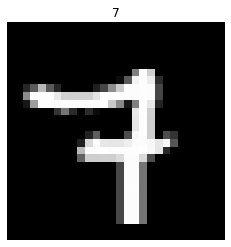

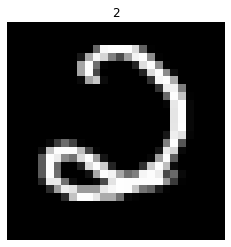

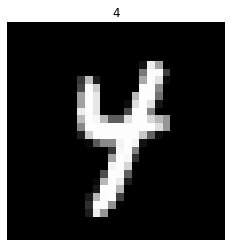

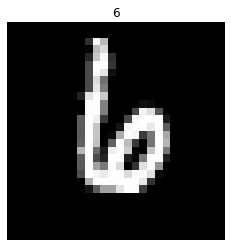

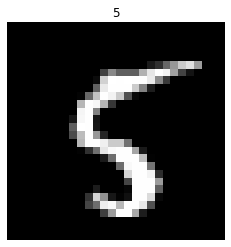

In [8]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(training_digit_input[i], cmap='gray')
    plt.axis("off")
    plt.title(f"{training_digit_label[i]}")
    plt.show()

The same structure of the data is used for the *test data*.

In [9]:
test_digit_input = np.load("data/test_digit_input.npy")
print("Shape of the digit input test data set:", test_digit_input.shape)
print(test_digit_input[0])
test_digit_label = np.load("data/test_digit_label.npy")
print("Shape of the digit label test data set:", test_digit_label.shape)
print(test_digit_label)

Shape of the digit input test data set: (300, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  62 131 123 236 148 148  87  43  43  14
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  27 218 252 252 252 252 253 252 252 211
  102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  12  21  21  91  82 144 231 240 245
  252 216  32   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  35 169
  252 253 133   0   0   0   0   0   0   0]
 [  0   0 

When doing feature extraction the input data is flatten to have the shape (n, 784), where $784 = 28 \times 28$.

## Feature engineering for digit classification
**Write all of the code for your feature extraction below this cell.**

We also provide the code of the basic feature extraction for your reference. You may insert more cells below this if you wish, but you **must not** duplicate any cells as this can break the grading script.

### Submission Requirements
The code for your feature extractor should be included in the `BetterFeatureExtractor` function below. We will call this function to generate new features.

<font color='red'>**If you wish to use the testing code provided below**, your code must provide a variable with the name `digit_classifier`. This object must have a method called `train` which takes input data and input labels and tune internal parameters of the classifier (if required). If your classifier does not need to use the `train` method (e.g., k-Nearest Neighbour method doesn't use explicit training), you should still have the `train` method, but you can leave it empty with the command `pass`.

`digit_classifier` must also have a method called `predict` which takes input data and returns class predictions.

Since you are only assessed for part 2 by your implementation of the `BetterFeatureExtractor` function, you do not have to have the `digit_classifier` variable. In this case the testing code provided below will skip some tests.
</font>

The input data will be a single $n \times m$ numpy array, where $n$ is the number of data points and $m$ is the number of features ($m = 784$ for the basic features). Your classifier <font color='red'> for your testing</font> should support working with different number of features if your new features are of a different dimension. <font color='red'> Our implementation of the classifier that will be used for assessment does support working with different number of features, so your new features can be of any dimension.</font> The input labels will be a single numpy array of length $n$ with true classifications for the input data (for the `train` method).

<font color='red'> If you wish to use the testing code provided below,</font> your classifier when calling the `predict` method should return a numpy array of length $n$ with classifications. There is a demo in the cells below, and a test you can run before submission to check that your code is working correctly.

<font color='red'>~~Your code~~ Our implementation of the naïve Bayes classification method</font> must run on our test machine in under 5 minutes - both training and prediction (on given training and test data <font color='red'>with your new features</font>).

Remember that we will be testing your <font color='red'>~~classifier~~ new features</font> on additional hidden data.

In [10]:
def BasicFeatureExtractor(input_data):
    """
    Returns basic extracted features for input_data. 
    A binary feature for each pixel: 0 if a pixel is black, 1 otherwise
    
    :param input_data: a 3-dimensional numpy array of the shape (n, 28, 28)
                       input data of n images of 28x28 pixels
    
    :return extracted_features: a 2-dimensional numpy array of the shape (n, 784)
                                extracted binary features 
    """
    # compute binary features for each pixel
    extracted_features = (input_data > 0).astype(int)
    
    # flatten images of 28x28 pixels into a vector of 784 length
    extracted_features = np.reshape(extracted_features, (extracted_features.shape[0], -1))
    
    return extracted_features

In [11]:
def BetterFeatureExtractor(input_data):
    """
    A function for your improved feature extractor
    
    :param input_data: a 3-dimensional numpy array of the shape (n, 28, 28)
                       input data of n images of 28x28 pixels
    
    :return extracted_features: a 2-dimensional numpy array of the shape (n, m)
                                extracted binary m features for n images  
    """
    n = input_data.shape[0]
    extracted_features = BasicFeatureExtractor(input_data)
    sym_features = np.zeros((n, 2))
    average = np.mean(input_data, axis=(1, 2))
    black = np.sum(input_data == 0, axis=(1, 2))
    white = np.sum(input_data == 255, axis=(1, 2))
    
    for i in range(n):
        img = input_data[i]
        horiz_sym = np.mean(img[:14, :], axis=0) == np.mean(np.flip(img[14:, :], axis=0), axis=0)
        vert_sym = np.mean(img[:, :14], axis=1) == np.mean(np.flip(img[:, 14:], axis=1), axis=1)
        sym_features[i] = [np.mean(horiz_sym), np.mean(vert_sym)]
        
    #Converting to binary
    sym_features = (sym_features > 0.3).astype(int)
    average = (average > 0).astype(int)
    black = (black > 0).astype(int)
    white = (white > 0).astype(int)
        
    extracted_features = np.concatenate((extracted_features,sym_features, average[:, np.newaxis], black[:, np.newaxis], white[:, np.newaxis]), axis=1)
    return extracted_features

In [12]:


digit_classifier = MyClassifier()

**Write all of the code for part 2 of the assignment above this cell.**

### Testing Details
<font color='red'>~~Your classifier~~ Our classifier</font> performance with both the basic and new features will be tested against some hidden data. The accuracy (percentage of classifications correct) will be calculated and measured whether you get any improvement by using new features in comparison to using the basic features.

#### Test Cell
The following code will run your classifier with both the basic and new features against the provided test data. To enable it, set the constant `SKIP_TESTS` to `False`. <font color='red'>You do not have to use these tests as we are only assessing your implementation of the `BetterFeatureExtractor` function. These tests are provided to help you testing your new features, but you can ignore these tests and use your own. </font>

The original skeleton code above classifies every row as 0 (and do not depend on the input data). Moreover, the original code of BetterFeatureExtractor function just returns the basic features. However, once you have written your own classifier and your own BetterFeatureExtractor function you can run this cell again to test it. So long as your code implements BetterFeatureExtractor function and sets up a variable called `digit_classifier` with methods called `train` and `predict`, the test code will be able to run. 

As with the spam filtering you may wish to test your classifier in additional ways<font color='red'>. ~~, but you *must* ensure this version still runs before submitting.~~</font>

**IMPORTANT**: you must set `SKIP_TESTS` back to `True` before submitting this file!

In [13]:
SKIP_TESTS = True

if not SKIP_TESTS:
    test_digit_input = np.load("data/test_digit_input.npy")
    test_digit_label = np.load("data/test_digit_label.npy")
    
    # train classifier on basic features
    training_data = BasicFeatureExtractor(training_digit_input)
    
    if "digit_classifier" not in locals():
        print("There is no digit_classifier variable, so tests are unable to run")
    elif (not hasattr(digit_classifier, 'train')) or \
        (not hasattr(digit_classifier, 'predict')):
        print("The variable digit_classifier does not have train and predict methods, so tests are unable to run")
    else:
        digit_classifier.train(training_data, training_digit_label)

        # test classifier on basic features
        test_data = BasicFeatureExtractor(test_digit_input)
        basic_feature_predictions = digit_classifier.predict(test_data)
        basic_feature_accuracy = np.count_nonzero(
            basic_feature_predictions == test_digit_label)/test_digit_label.shape[0]
        print(f"Accuracy on test data using basic features is: {basic_feature_accuracy}")

        # train classifier on new features
        training_data = BetterFeatureExtractor(training_digit_input)
        digit_classifier.train(training_data, training_digit_label)

        # test_classifier on new features
        test_data = BetterFeatureExtractor(test_digit_input)
        new_feature_predictions = digit_classifier.predict(test_data)
        new_feature_accuracy = np.count_nonzero(
            new_feature_predictions == test_digit_label)/test_digit_label.shape[0]
        print(f"Accuracy on test data using new features is: {new_feature_accuracy}")

        # compare accuracies achieved on different sets of features
        accuracy_gain = new_feature_accuracy - basic_feature_accuracy
        print(f"Accuracy gained by using new features is: {accuracy_gain}")

# Submission test <a name="Submission-Test"></a>
The following cell tests if your notebook is ready for submission. **You must not skip this step!**

Restart the kernel and run the entire notebook (Kernel → Restart & Run All). Now look at the output of the cell below.

If there is no output, then your submission is not ready. Either your code is still running (did you forget to skip tests?) or it caused an error.

As previously mentioned, failing to follow these instructions can result in a grade of zero.

In [14]:
import sys
import pathlib

fail = False;

if not SKIP_TESTS:
    fail = True;
    print("You must set the SKIP_TESTS constant to True in the cell above.")
    
p1 = pathlib.Path('./readme.txt')
p2 = pathlib.Path('./readme.md')
if not (p1.is_file() or p2.is_file()):
    fail = True;
    print("You must include a separate file called readme.txt or readme.md in your submission.")
    
p3 = pathlib.Path('./classification.ipynb')
if not p3.is_file():
    fail = True
    print("This notebook file must be named classification.ipynb")
    
if "my_accuracy_estimate" not in dir():
    fail = True;
    print("You must include a function called my_accuracy_estimate.")
else:
    if my_accuracy_estimate() == 0.5:
        print("Warning:")
        print("You do not seem to have provided an accuracy estimate, it is set to 0.5.")
        print("This is the actually the worst possible accuracy – if your classifier")
        print("got 0.1 then it could invert its results to get 0.9!")
    
if "spam_classifier" not in locals():
    fail = True
    print("Your code should contain the variable spam_classifier.")
else:
    if not hasattr(spam_classifier, 'predict'):
        fail = True
        print("The variable spam_classifier should have the method 'predict'.")
        
if "digit_classifier" not in locals():
    print("Warning:")
    print("If you opt to submit the code for the second part of the assignment,")
    print("please note that your code does not contain the variable digit_classifier.")
    print("Therefore, our tests for part 2 are unable to run, but it would not affect your mark")
    print("as long as your implementation of the BetterFeatureExtractor function is correct.")
else:
    if (not hasattr(digit_classifier, 'train')) or \
        (not hasattr(digit_classifier, 'predict')):
            print("Warning:")
            print("If you opt to submit the code for the second part of the assignment,")
            print("please note that the variable digit_classifier does not have both methods 'train' and 'predict'.")
            print("Therefore, our tests for part 2 are unable to run, but it would not affect your mark")
            print("as long as your implementation of the BetterFeatureExtractor function is correct.")
            
test_digit_input = np.load("data/test_digit_input.npy")
test_data_basic = BasicFeatureExtractor(test_digit_input)
test_data_new = BetterFeatureExtractor(test_digit_input)
if not isinstance(test_data_new, np.ndarray):
    fail = True
    print("The BetterFeatureExtractor function should return a numpy array.")
if np.array_equal(test_data_basic, test_data_new):
    print("Warning:")
    print("If you opt to submit the code for the second part of the assignment")
    print("you do not seem to implement the BetterFeatureExtractor function.")
    print("It returns the basic features.")
    
if len(test_data_new.shape) != 2:
    fail = True
    print("The BetterFeatureExtractor function should return a 2-dimensional array.")

if test_data_new.shape[0] != 300:
    fail = True
    print("The BetterFeatureExtractor function should not alter the first dimension,")
    print("which should correspond to the number of data points in the data.")
    
if not np.array_equal(np.unique(test_data_new), np.array([0, 1])):
    fail = True
    print("The BetterFeatureExtractor function should return only binary features.")
    
if fail:
    sys.stderr.write("Your submission is not ready! Please read and follow the instructions above.")
else:
    print("All checks passed. When you are ready to submit, upload the notebook and readme file to the")
    print("assignment page, without changing any filenames.")
    print()
    print("INFO: Make sure you include a readme file into your submission.")
    print("Failing to include this could result in an overall grade of zero.")
    print()
    print("If you need to submit multiple files, you can archive them in a .zip file. (No other format.).")
    print("Please note that you can submit up to 20 files without archiving them.")

You must include a separate file called readme.txt or readme.md in your submission.


Your submission is not ready! Please read and follow the instructions above.

In [15]:
# This is a test cell. Please do not modify or delete.